# assignment 1  
Analyzing Sales Data from Multiple File Formats

## tasks to perform
Obtain sales data files in various formats, such as CSV, Excel, and JSON.
1. Load the sales data from each file format into the appropriate data structures or
dataframes.
2. Explore the structure and content of the loaded data, identifying any inconsistencies,
missing values, or data quality issues.
3. Perform data cleaning operations, such as handling missing values, removing
duplicates, or correcting inconsistencies.
4. Convert the data into a unified format, such as a common dataframe or data structure,
to enable seamless analysis.
5. Perform data transformation tasks, such as merging multiple datasets, splitting
columns, or deriving new variables.
6. Analyze the sales data by performing descriptive statistics, aggregating data by
specific variables, or calculating metrics such as total sales, average order value, or
product category distribution.
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales
data and gain insights into sales trends, customer behavior, or product performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# it is a good practice to specify the encoding method used for the dataset
df_csv = pd.read_csv("sales_data_sample.csv", encoding="cp1252") # dataset we are using is encoded using windows 1252 encoding

In [3]:
df_csv.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
# trying to look for outliers in the dataset
df_csv.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [4]:
# the dataset we have acquired is of shape (2823, 25) meaning 2823 rows and 25 columns
print(f"Shape of the dataset : {df_csv.shape}")

Shape of the dataset : (2823, 25)


In [5]:
# finding the data types 
print(f"Data types : \n{df_csv.dtypes}")

Data types : 
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


In [6]:
# finding the number of null values the in the dataset column wise
print(f"Sum of null values : \n{df_csv.isnull().sum()}")

# we find that we have ADDRESSLINE2 - 2521 null values which is not really crucial for our analysis so we could drop the column
# we have STATE- 1486 null values if incase our analysis doesn't require precise location we could leave this column as null or alternatively fill with a placeholder value (like "Unknown")
# we have POSTALCODE- 76 null values you could consider using external sources to fill in missing postal codes. Some data providers offer APIs that can help you retrieve postal codes based on addresses
# territory column could be dropped

Sum of null values : 
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [7]:
# finding relationships and discrepancies in the QUANTITYORDERED and PRICEEACH columns

# Calculate total sales from quantity and price
calculated_sales = df_csv['QUANTITYORDERED'] * df_csv['PRICEEACH']

# Compare calculated sales with SALES column values
discrepancies = df_csv[df_csv['SALES'] != calculated_sales]

if discrepancies.empty:
    print("No discrepancies found. Calculated sales match SALES column.")
else:
    print("Discrepancies found between calculated sales and SALES column:")
    print(discrepancies[['ORDERNUMBER', 'SALES', 'QUANTITYORDERED', 'PRICEEACH']])
    df_csv["CALCULATED_SALES"] = calculated_sales # if there are any discrepancies found add a new column to the dataframe

Discrepancies found between calculated sales and SALES column:
      ORDERNUMBER    SALES  QUANTITYORDERED  PRICEEACH
1           10121  2765.90               34      81.35
2           10134  3884.34               41      94.74
3           10145  3746.70               45      83.26
4           10159  5205.27               49     100.00
5           10168  3479.76               36      96.66
...           ...      ...              ...        ...
2816        10327  3209.38               37      86.74
2818        10350  2244.40               20     100.00
2819        10373  3978.51               29     100.00
2820        10386  5417.57               43     100.00
2822        10414  3079.44               47      65.52

[1697 rows x 4 columns]


In [8]:
# added a new column CALCULATED_SALES
df_csv.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CALCULATED_SALES
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2871.00
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2765.90
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,3746.70
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4900.00


### we are supposed to merge multiple datasets but i dont see the point of merging the same datasets so SKIPPED!

In [9]:
# Calculate Total Sales
total_sales = df_csv['SALES'].sum()
print(f"Total Sales: ${total_sales:.2f}")

Total Sales: $10032628.85


In [10]:
# Calculate Average Order Value
average_order_value = df_csv['SALES'].mean()
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $3553.89


In [11]:
# Calculate Product Category Distribution
product_category_distribution = df_csv['PRODUCTLINE'].value_counts(normalize=True) * 100
print("Product Category Distribution:")
print(product_category_distribution)

Product Category Distribution:
PRODUCTLINE
Classic Cars        34.254339
Vintage Cars        21.501948
Motorcycles         11.725115
Planes              10.839532
Trucks and Buses    10.662416
Ships                8.289054
Trains               2.727595
Name: proportion, dtype: float64


In [12]:
# Aggregating Data by Country
sales_by_country = df_csv.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print("Sales by Country:")
print(sales_by_country)

Sales by Country:
COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64


In [13]:
# Aggregating Data by Year and Quarter
sales_by_year_quarter = df_csv.groupby(['YEAR_ID', 'QTR_ID'])['SALES'].sum().unstack()
print("Sales by Year and Quarter:")
print(sales_by_year_quarter)

Sales by Year and Quarter:
QTR_ID            1          2           3           4
YEAR_ID                                               
2003      445094.69  562365.22   649514.54  1860005.09
2004      833730.68  766260.73  1109396.27  2014774.92
2005     1071992.36  719494.35         NaN         NaN


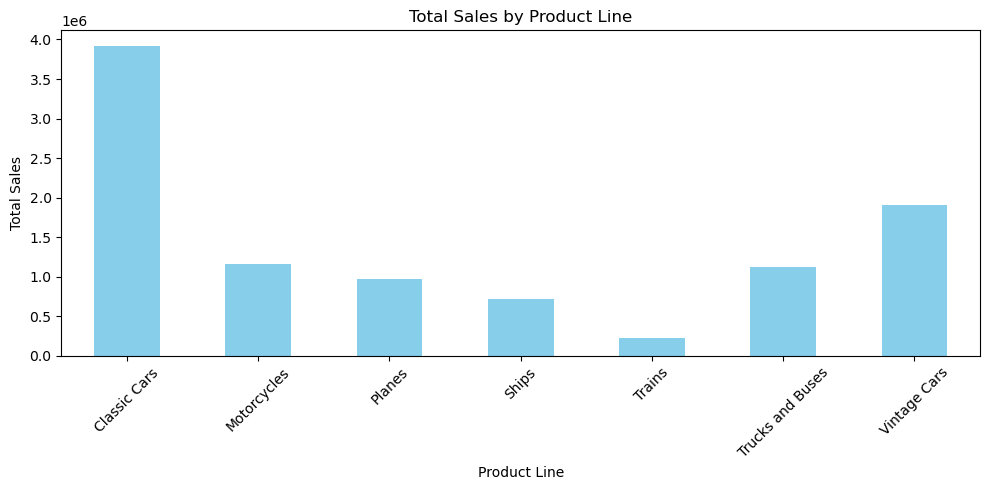

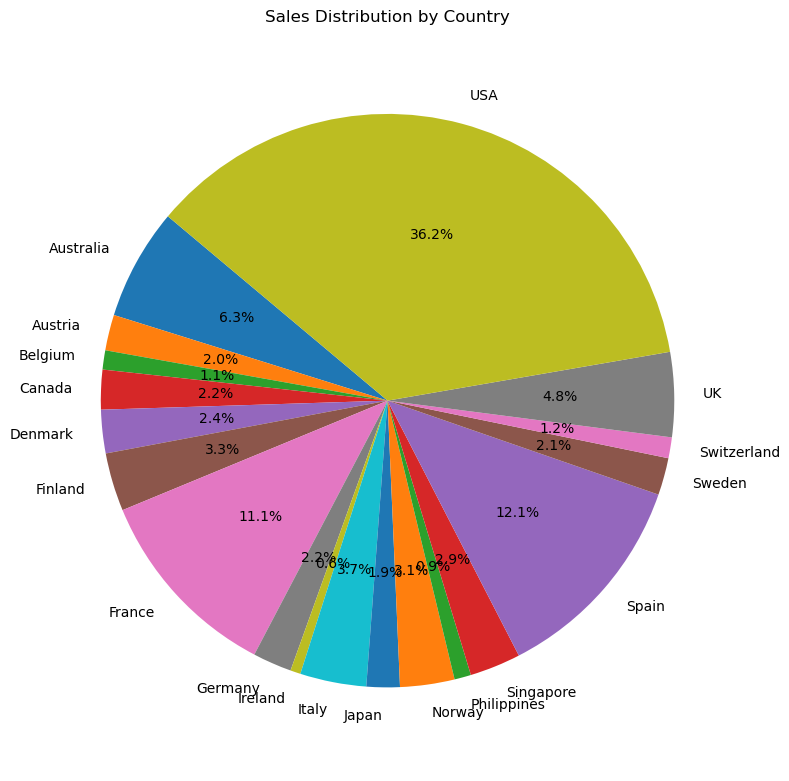

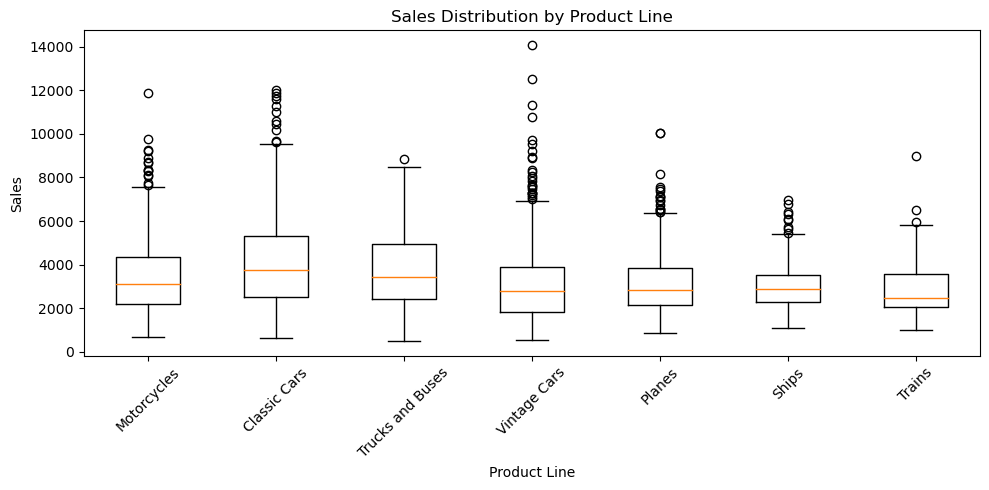

In [14]:
# Bar Plot for Product Line Sales
product_line_sales = df_csv.groupby('PRODUCTLINE')['SALES'].sum()
plt.figure(figsize=(10, 5))
product_line_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart for Sales by Country
country_sales = df_csv.groupby('COUNTRY')['SALES'].sum()
plt.figure(figsize=(8, 8))
plt.pie(country_sales, labels=country_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Country')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Box Plot for Product Line Sales Distribution
plt.figure(figsize=(10, 5))
plt.boxplot([df_csv[df_csv['PRODUCTLINE'] == p]['SALES'] for p in df_csv['PRODUCTLINE'].unique()])
plt.title('Sales Distribution by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(range(1, len(df_csv['PRODUCTLINE'].unique()) + 1), df_csv['PRODUCTLINE'].unique(), rotation=45)
plt.tight_layout()
plt.show()